In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
import cv2, os

In [2]:
os.mkdir("CV_Good_Bad_Syringes")

In [3]:
train_dir = "E:\\Local Disk D_3192023833\\Private\\Programming\\AMIT\\AI and ML Diploma\\Python\\Sessions\\Good_Bad_Syringes_Separate_Folders\\Camera2\\Training\\Face"
test_dir = "E:\\Local Disk D_3192023833\\Private\\Programming\\AMIT\\AI and ML Diploma\\Python\\Sessions\\Good_Bad_Syringes_Separate_Folders\\Camera2\\Testing\\Face"

# to load images and save memmory to avoid laptop overloading and split to train and validation data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, validation_split=0.2) 

# Spliting train and validation images and target a certain image size
train_generator = train_datagen.flow_from_directory(train_dir, target_size= (50,50), color_mode = "grayscale", batch_size= 3, class_mode="binary", subset= "training")
validation_generator = train_datagen.flow_from_directory(train_dir, target_size= (50,50), color_mode = "grayscale", batch_size= 3, class_mode="binary", subset= "validation")

Found 227 images belonging to 2 classes.
Found 55 images belonging to 2 classes.


In [4]:
model = tf.keras.models.Sequential()

model.add(Conv2D(16, kernel_size= (3,3), activation = "relu", input_shape = (50,50,1), padding = "same"))
model.add(MaxPooling2D(pool_size=(2,2), padding = "same")) # stride = pooling size

model.add(Conv2D(32, kernel_size= (3,3), activation = "relu", input_shape = (50,50,1), padding = "same"))
model.add(MaxPooling2D(pool_size=(2,2), padding = "same")) # stride = pooling size

model.add(Conv2D(64, kernel_size= (3,3), activation = "relu", input_shape = (50,50,1), padding = "same"))
model.add(MaxPooling2D(pool_size=(2,2), padding = "same")) # stride = pooling size

model.add(Conv2D(64, kernel_size= (3,3), activation = "relu", input_shape = (50,50,1), padding = "same"))
model.add(MaxPooling2D(pool_size=(2,2), padding = "same")) # stride = pooling size

model.add(Flatten())

model.add(Dropout(0.5)) # used during the traing only
model.add(Dense(128, activation = tf.nn.relu))

model.add(Dropout(0.5)) # used during the traing only
model.add(Dense(256, activation = tf.nn.relu))

model.add(Dense(1, activation = "sigmoid")) # 1 class only because we define the class_mode as binary 

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0

In [5]:
model.compile(optimizer="adam", loss= "binary_crossentropy", metrics= ["accuracy"])

history = model.fit_generator(train_generator, epochs=20, validation_data=validation_generator, validation_steps=len(validation_generator))

Epoch 1/20


C:\Users\Alaswad\AppData\Local\Temp\ipykernel_24080\3516659116.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=20, validation_data=validation_generator, validation_steps=len(validation_generator))


76/76 [==============================] - 4s 29ms/step - loss: 0.5466 - accuracy: 0.8282 - val_loss: 0.4463 - val_accuracy: 0.8364
Epoch 2/20
76/76 [==============================] - 2s 27ms/step - loss: 0.5345 - accuracy: 0.8238 - val_loss: 0.4795 - val_accuracy: 0.8364
Epoch 3/20
76/76 [==============================] - 2s 26ms/step - loss: 0.4819 - accuracy: 0.8238 - val_loss: 0.4456 - val_accuracy: 0.8364
Epoch 4/20
76/76 [==============================] - 2s 26ms/step - loss: 0.4868 - accuracy: 0.8238 - val_loss: 0.4837 - val_accuracy: 0.8364
Epoch 5/20
76/76 [==============================] - 2s 30ms/step - loss: 0.4992 - accuracy: 0.8238 - val_loss: 0.4668 - val_accuracy: 0.8364
Epoch 6/20
76/76 [==============================] - 2s 32ms/step - loss: 0.4715 - accuracy: 0.8238 - val_loss: 0.4669 - val_accuracy: 0.8364
Epoch 7/20
76/76 [==============================] - 3s 35ms/step - loss: 0.4499 - accuracy: 0.8238 - val_loss: 0.4535 - val_accuracy: 0.8364
Epoch 8/20
76/76 [======

1/1 [==============================] - 0s 43ms/step
Confidence : [[75.29916]] % 
Bad Syringes Without Needles


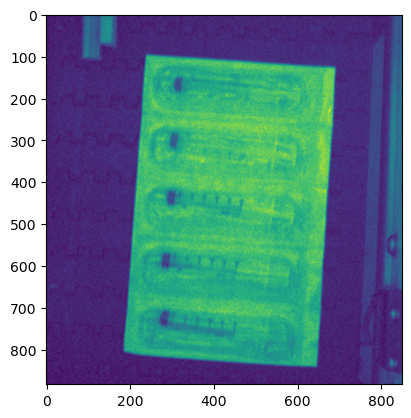

In [9]:
from tensorflow.keras.preprocessing.image import img_to_array

def  pred(path):
    image = cv2.imread(path,0)
    plt.imshow(image)

    image = cv2.resize(image, (50,50))
    img= img_to_array(image)
    img = img/255
    batch_img = np.expand_dims(img, axis=0)
    return batch_img

#p = pred("E:\\Local Disk D_3192023833\\Private\\Programming\\AMIT\\AI and ML Diploma\\Python\\Sessions\\Good_Bad_Syringes_Separate_Folders\\Camera2\\Testing\\Face\\42.bmp")   # Good
#p = pred("E:\\Local Disk D_3192023833\\Private\\Programming\\AMIT\\AI and ML Diploma\\Python\\Sessions\\Good_Bad_Syringes_Separate_Folders\\Camera2\\Testing\\Face\\690.bmp")  # Bad
#p = pred("E:\\Local Disk D_3192023833\\Private\\Programming\\AMIT\\AI and ML Diploma\\Python\\Sessions\\Good_Bad_Syringes_Separate_Folders\\Camera2\\Testing\\Face\\903.bmp")  # Bad
#p = pred("E:\\Local Disk D_3192023833\\Private\\Programming\\AMIT\\AI and ML Diploma\\Python\\Sessions\\Good_Bad_Syringes_Separate_Folders\\Camera2\\Testing\\Face\\54.bmp")   # Good
p = pred("E:\\Local Disk D_3192023833\\Private\\Programming\\AMIT\\AI and ML Diploma\\Python\\Sessions\\Good_Bad_Syringes_Separate_Folders\\Camera2\\Testing\\Face\\700.bmp")  # Bad
#p = pred("E:\\Local Disk D_3192023833\\Private\\Programming\\AMIT\\AI and ML Diploma\\Python\\Sessions\\Good_Bad_Syringes_Separate_Folders\\Camera2\\Testing\\Face\\41.bmp")   # Good
#p = pred("E:\\Local Disk D_3192023833\\Private\\Programming\\AMIT\\AI and ML Diploma\\Python\\Sessions\\Good_Bad_Syringes_Separate_Folders\\Camera2\\Testing\\Face\\52.bmp")   # Good

cls = model.predict(p)
print(f"Confidence : {cls*100} % ")
if cls > 0.93:
    print("Good Syringes With Needles")
else:
    print("Bad Syringes Without Needles")
